In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
#from imblearn.over_sampling import RandomOverSampler
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_excel(r"C:\Users\Lenovo\Desktop\researchData1.xlsx")
df1.head()

,Date,Max. Temp,Avg.Temp.,Min. Temp,DewPoint,Max. Humidity(%),Avg. Humidity(%),Min. Humidity(%),Max. Wind speed(km/h),Avg . WindSpeed,Min. WindSpeed,Pressure(KPa),Precipitation(mm)
0,2014-01-01,17,13.1,9,11.5,100,92.4,78,11,7.6,4,99.35,0.00
1,2014-01-02,18,10.9,6,7.8,100,82.8,51,15,8.3,0,99.26,0.00
2,2014-01-03,19,12.4,6,8.6,100,80.4,52,15,5.4,0,99.07,0.00
3,2014-01-04,18,12.6,8,10.9,100,90.6,73,6,1.3,0,98.87,0.01
4,2014-01-05,18,12.0,8,10.8,100,91.8,75,4,0.5,0,98.70,0.00


In [3]:
df1.shape

(3541, 13)

In [4]:
df2 = df1
X = df2.drop(['Precipitation(mm)','Date'],axis='columns')
X.head(3)

,Max. Temp,Avg.Temp.,Min. Temp,DewPoint,Max. Humidity(%),Avg. Humidity(%),Min. Humidity(%),Max. Wind speed(km/h),Avg . WindSpeed,Min. WindSpeed,Pressure(KPa)
0,17,13.1,9,11.5,100,92.4,78,11,7.6,4,99.35
1,18,10.9,6,7.8,100,82.8,51,15,8.3,0,99.26
2,19,12.4,6,8.6,100,80.4,52,15,5.4,0,99.07


In [5]:
X.shape

(3541, 11)

In [6]:
y = df1.drop(['Date','Max. Temp','Avg.Temp.','Min. Temp','DewPoint','Max. Humidity(%)','Avg. Humidity(%)','Min. Humidity(%)','Max. Wind speed(km/h)','Avg . WindSpeed','Min. WindSpeed','Pressure(KPa)'],axis='columns')
y.head(3)

,Precipitation(mm)
0,0.0
1,0.0
2,0.0


In [7]:
len(y)

3541

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [9]:
X_test

,Max. Temp,Avg.Temp.,Min. Temp,DewPoint,Max. Humidity(%),Avg. Humidity(%),Min. Humidity(%),Max. Wind speed(km/h),Avg . WindSpeed,Min. WindSpeed,Pressure(KPa)
741,24,16.1,9,11.8,97,78.6,51,15,4.3,0,98.80
424,18,17.1,16,16.3,100,94.8,80,24,14.8,7,98.39
1634,42,37.0,33,21.4,59,42.3,25,7,4.3,0,97.12
173,36,30.8,29,22.8,71,63.2,50,15,4.7,0,97.11
447,34,25.5,18,19.0,94,71.4,34,7,1.4,0,98.39
...,...,...,...,...,...,...,...,...,...,...,...
640,36,29.8,23,20.5,77,59.7,36,19,6.0,0,98.24
1075,26,17.6,13,13.5,97,80.1,48,9,2.1,0,98.64
208,33,29.6,28,26.0,92,81.6,67,115,26.0,0,97.31
628,35,30.7,27,23.7,82,67.3,51,15,6.0,0,97.66


In [10]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.3453826161364033

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.24394548, 0.13867043, 0.3577021 , 0.17435022, 0.29397078])

In [12]:
y_pred = []
for element in y['Precipitation(mm)']:
    if element > 2:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [13]:
df3 = y
df3['PPT'] = y_pred
df3.head()

,Precipitation(mm),PPT
0,0.00,0
1,0.00,0
2,0.00,0
3,0.01,0
4,0.00,0


In [14]:
df4 = df3.drop(['Precipitation(mm)'],axis='columns')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df4,test_size=0.2,random_state=3)

In [16]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, df4, cv=cv)

array([0.37995123, 0.36490356, 0.39662735, 0.35129868, 0.37323225])

## Here we use ANN using tensorflow (Keras) using three dense layers by using Sigmoid and relu as activation Function.

In [17]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=500)

print(model.evaluate(X_test, y_test))
    
y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
    
print("Classification Report: \n", metrics.classification_report(y_test, y_preds))

Epoch 1/500
89/89 [==============================] - 5s 4ms/step - loss: 1.0108 - accuracy: 0.7419
Epoch 2/500
89/89 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.8672
Epoch 3/500
89/89 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8845
Epoch 4/500
89/89 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8789
Epoch 5/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8842
Epoch 6/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8838
Epoch 7/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8838
Epoch 8/500
89/89 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8743
Epoch 9/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8792
Epoch 10/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8824
Epoch 11/

89/89 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8909
Epoch 84/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.8951
Epoch 85/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8955
Epoch 86/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.8976
Epoch 87/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.8962
Epoch 88/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8941
Epoch 89/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.8930
Epoch 90/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8965
Epoch 91/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.8994
Epoch 92/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.8969
Epoch 93/500


89/89 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.8927
Epoch 165/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.8962
Epoch 166/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.8972
Epoch 167/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8983
Epoch 168/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.9001
Epoch 169/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2527 - accuracy: 0.8972
Epoch 170/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2487 - accuracy: 0.8987
Epoch 171/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.8955
Epoch 172/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2526 - accuracy: 0.8990
Epoch 173/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.8976
Epoc

89/89 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.9029
Epoch 246/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2453 - accuracy: 0.9011
Epoch 247/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2458 - accuracy: 0.8997
Epoch 248/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.9001
Epoch 249/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.9025
Epoch 250/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.9029
Epoch 251/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.8958
Epoch 252/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8955
Epoch 253/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.8951
Epoch 254/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.9018
Epoc

89/89 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8987
Epoch 327/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8972
Epoch 328/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.9011
Epoch 329/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9011
Epoch 330/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.8997
Epoch 331/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2434 - accuracy: 0.9029
Epoch 332/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8987
Epoch 333/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.8990
Epoch 334/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9004
Epoch 335/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2434 - accuracy: 0.9001
Epoc

89/89 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9022
Epoch 408/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9029
Epoch 409/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.9018
Epoch 410/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9025
Epoch 411/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9015
Epoch 412/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.9032
Epoch 413/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2420 - accuracy: 0.8997
Epoch 414/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.8987
Epoch 415/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2391 - accuracy: 0.9047
Epoch 416/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2409 - accuracy: 0.9011
Epoc

89/89 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9040
Epoch 489/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9040
Epoch 490/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9040
Epoch 491/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9057
Epoch 492/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9082
Epoch 493/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9004
Epoch 494/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.9050
Epoch 495/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9032
Epoch 496/500
89/89 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9068
Epoch 497/500
89/89 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.9032
Epoc

#### sigmoid = 1/(1 + e^(-x))
#### Rectified linear unit (Relu) = f(x) = max(0,x)

### Some Graphs to depict the overall model with different parameters

In [18]:
features = list(X.select_dtypes(include = np.number).columns)
#features.remove('day')
print(features)

['Max. Temp', 'Avg.Temp.', 'Min. Temp', 'DewPoint', 'Max. Humidity(%)', 'Avg. Humidity(%)', 'Min. Humidity(%)', 'Max. Wind speed(km/h)', 'Avg . WindSpeed', 'Min. WindSpeed', 'Pressure(KPa)']


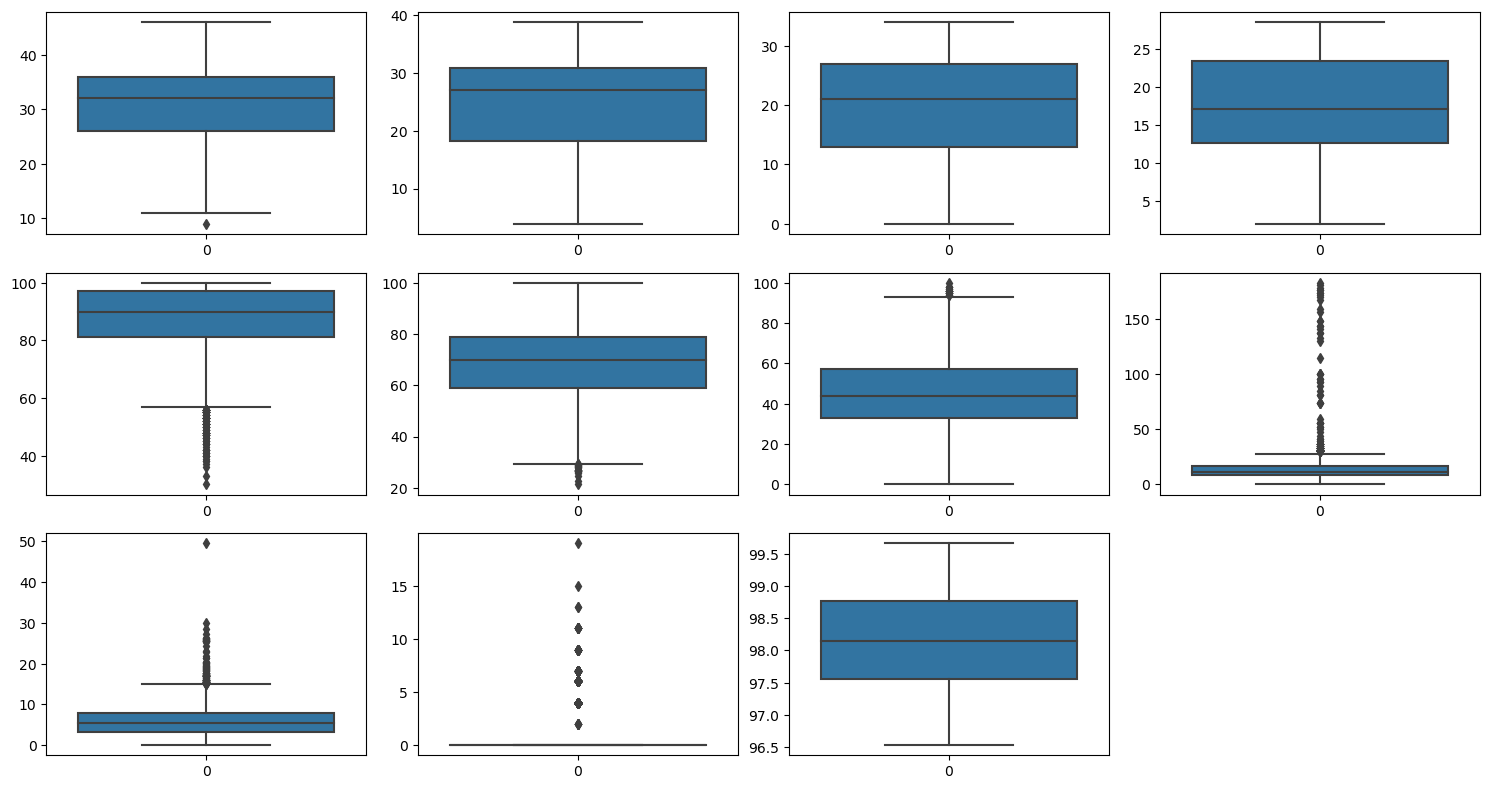

In [19]:
plt.subplots(figsize=(15,8))
 
for i, col in enumerate(features):
    plt.subplot(3,4, i + 1)
    sb.boxplot(df2[col])
plt.tight_layout()
plt.show()

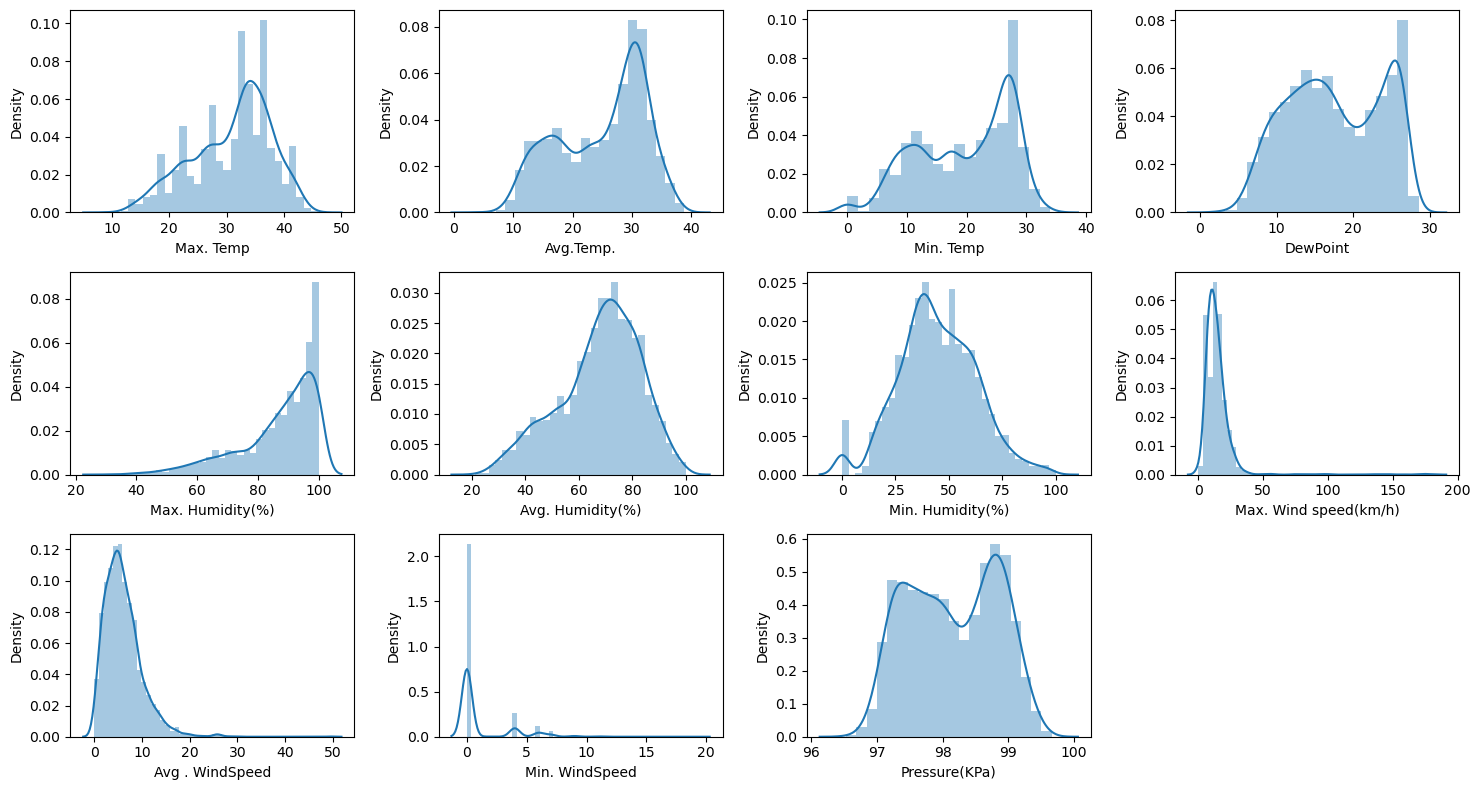

In [20]:
import seaborn as sb
plt.subplots(figsize=(15,8))
 
for i, col in enumerate(features):
    plt.subplot(3,4, i + 1)
    sb.distplot(df2[col])
plt.tight_layout()
plt.show()

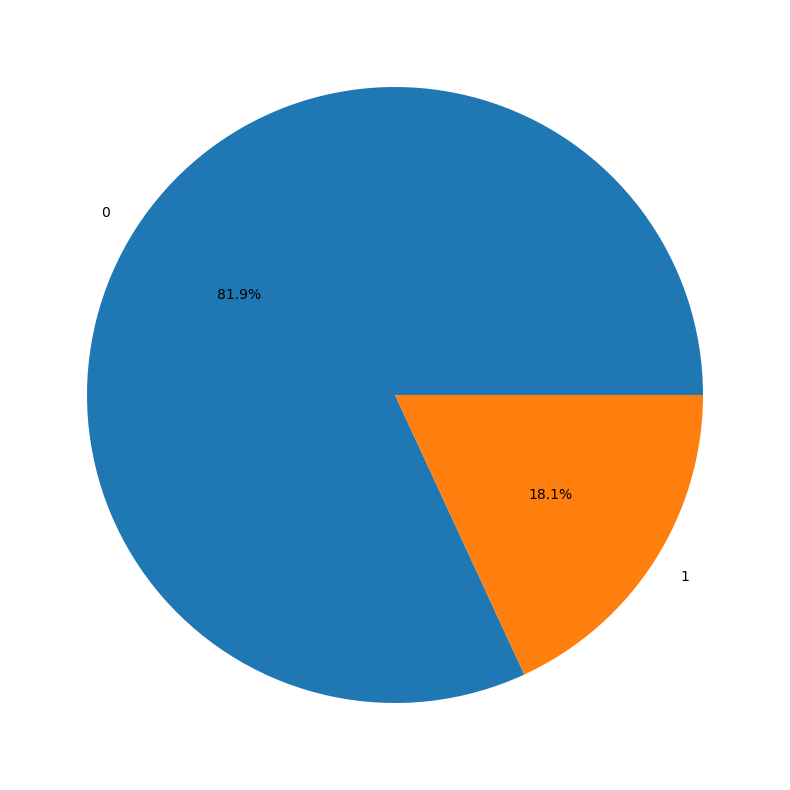

In [21]:
plt.pie(df4['PPT'].value_counts().values,
        labels = df4['PPT'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

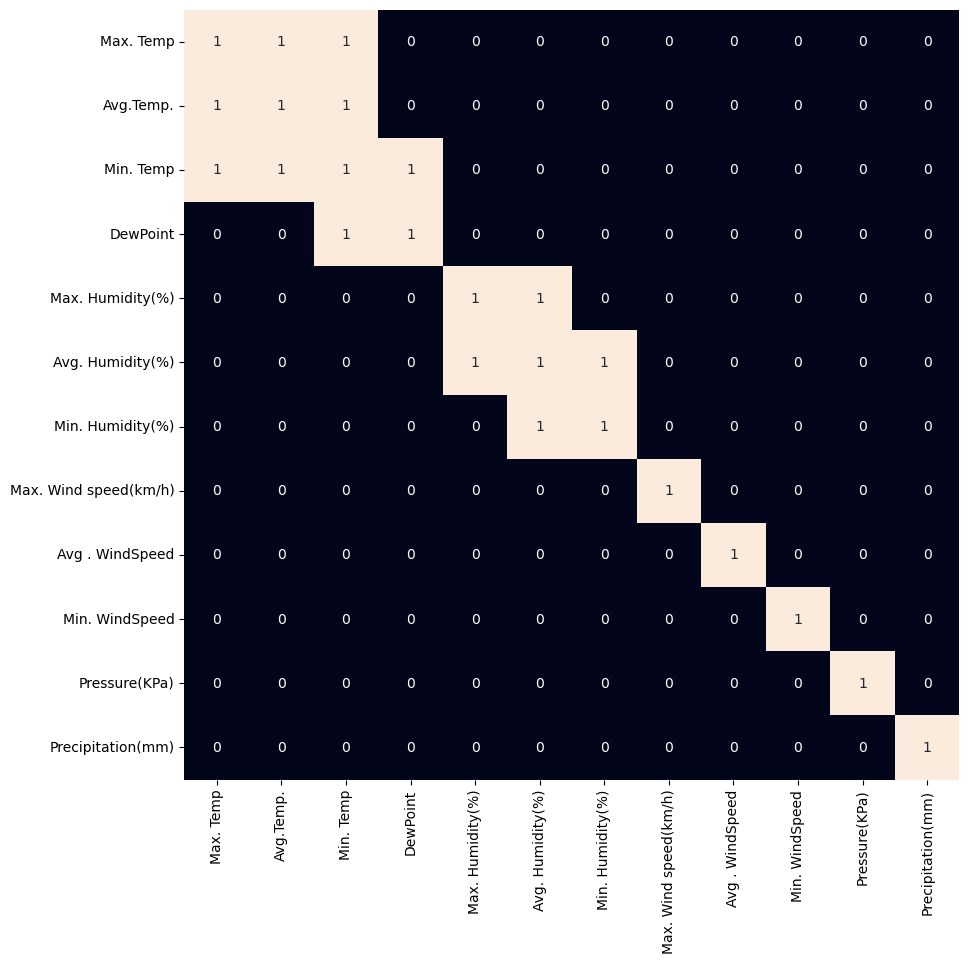

In [22]:
plt.figure(figsize=(10,10))
sb.heatmap(df2.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

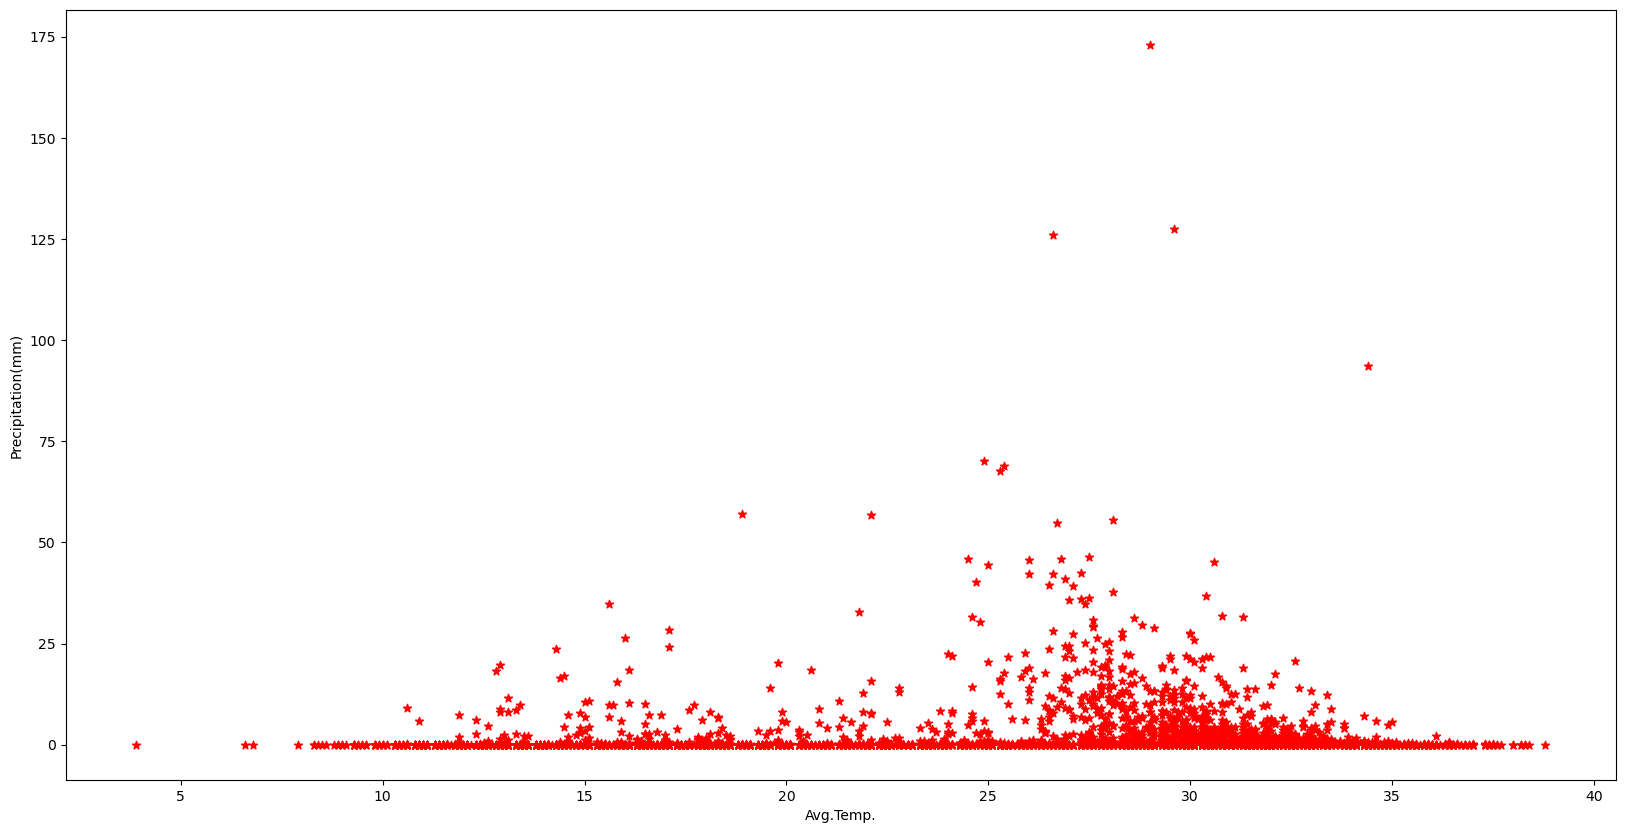

In [23]:
plt.xlabel('Avg.Temp.')
plt.ylabel('Precipitation(mm)')
plt.scatter(df1['Avg.Temp.'],df1['Precipitation(mm)'],color='Red',marker='*')

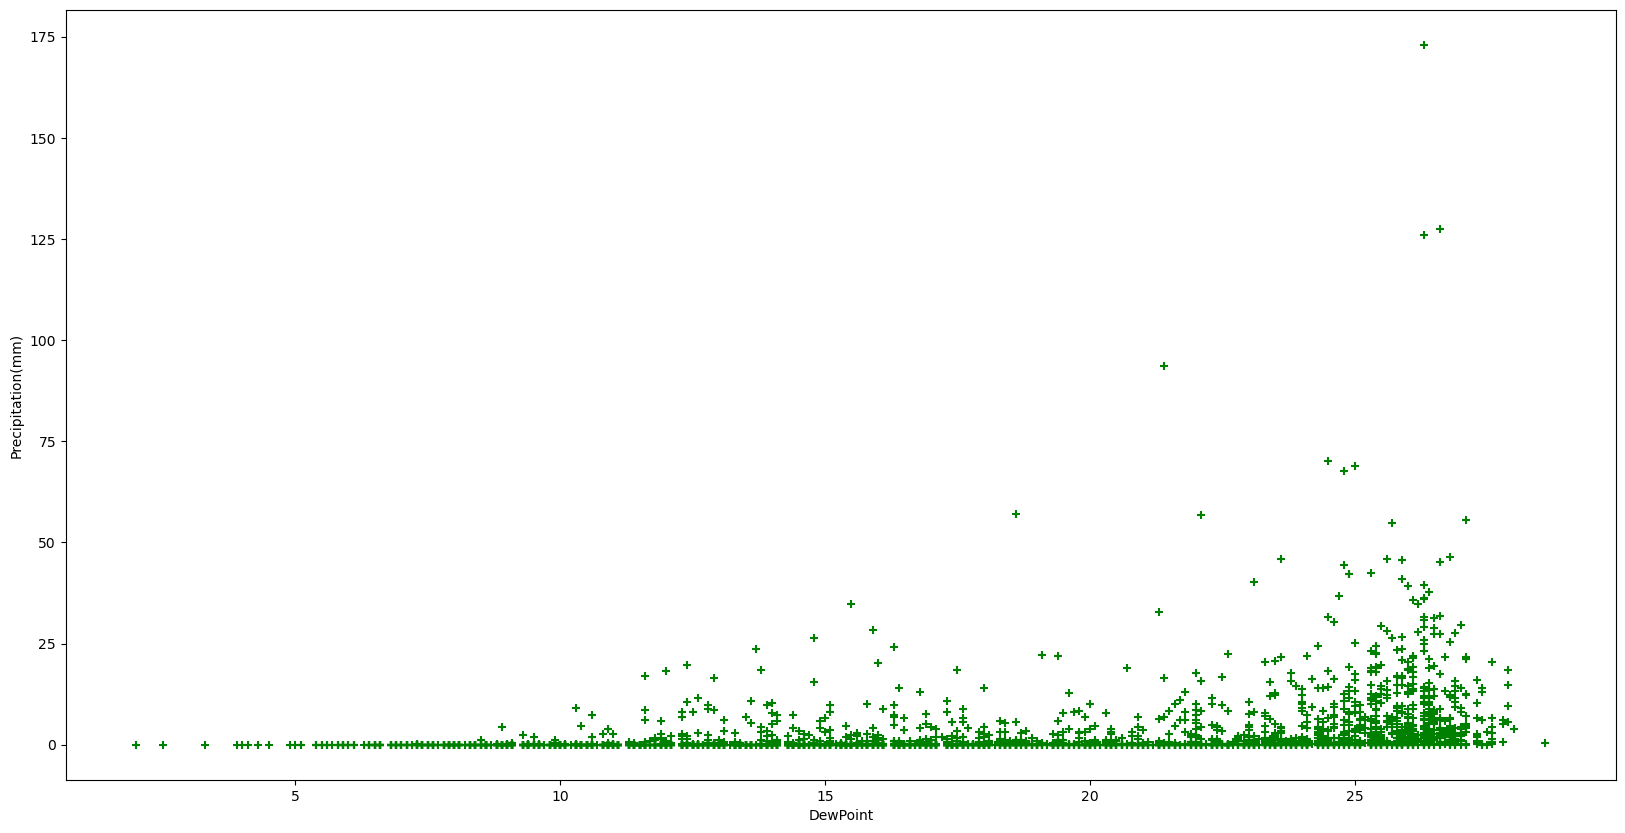

In [24]:
plt.xlabel('DewPoint')
plt.ylabel('Precipitation(mm)')
plt.scatter(df1['DewPoint'],df1['Precipitation(mm)'],color='Green',marker='+')

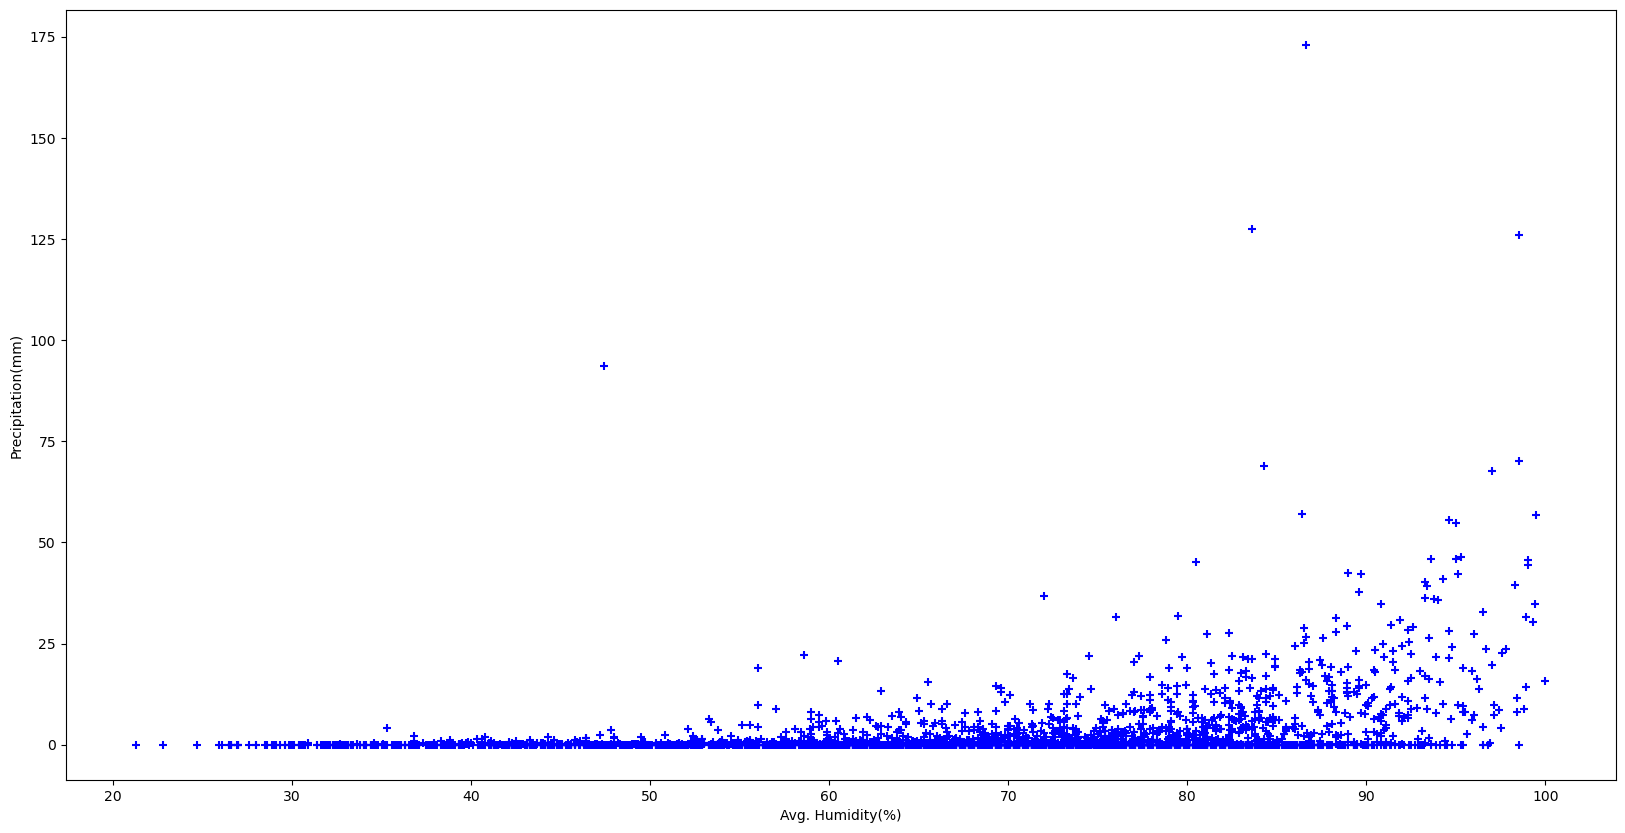

In [25]:
plt.xlabel('Avg. Humidity(%)')
plt.ylabel('Precipitation(mm)')
plt.scatter(df1['Avg. Humidity(%)'],df1['Precipitation(mm)'],color='Blue',marker='+')

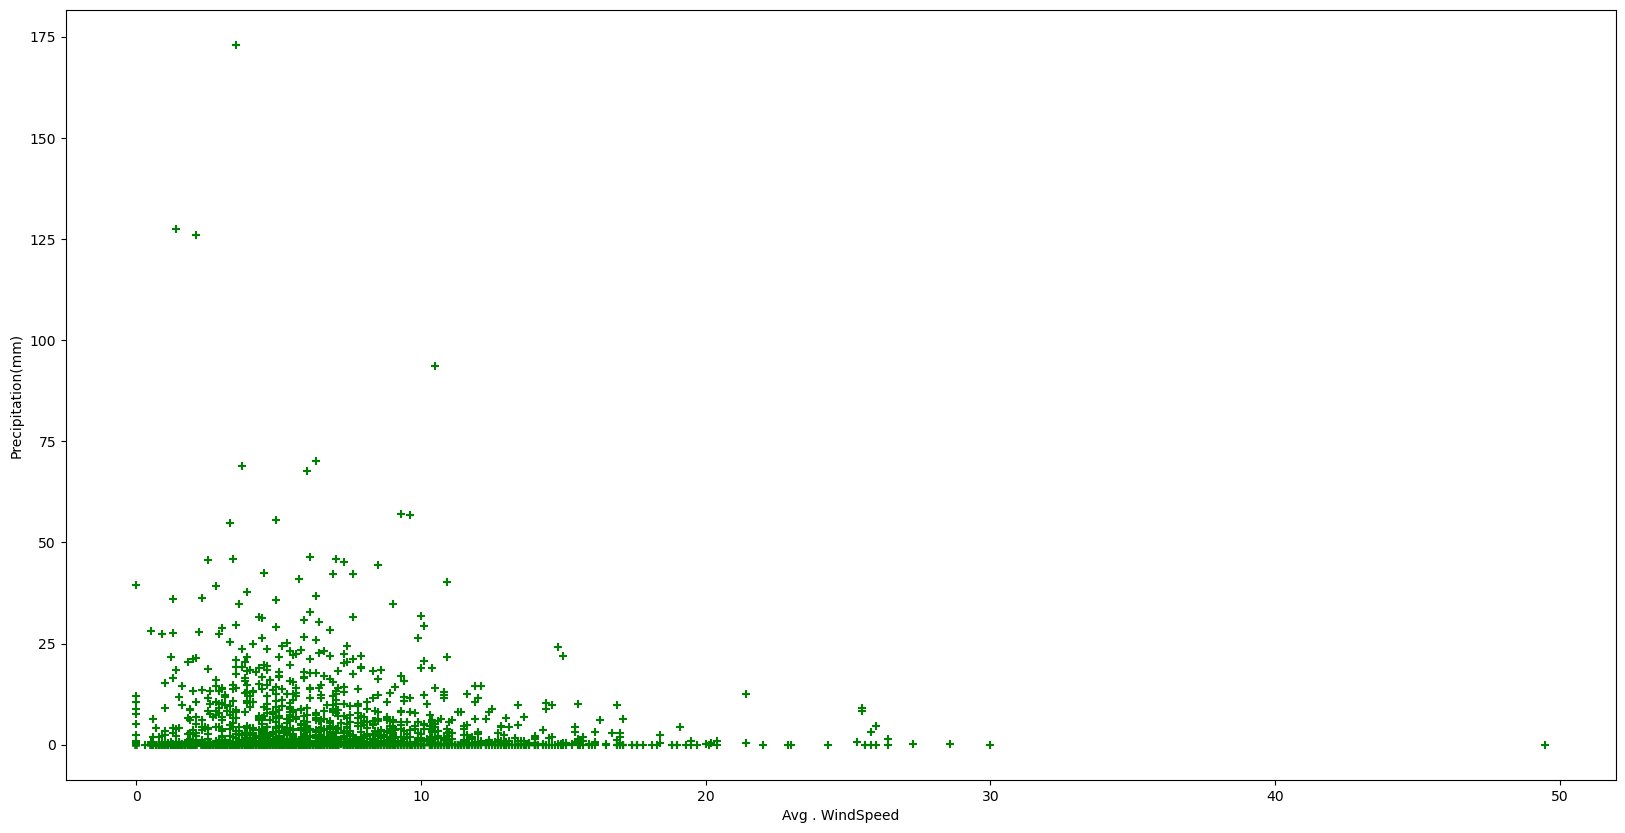

In [26]:
plt.xlabel('Avg . WindSpeed')
plt.ylabel('Precipitation(mm)')
plt.scatter(df1['Avg . WindSpeed'],df1['Precipitation(mm)'],color='green',marker='+')

In [27]:
dummy = X[3468:3499]

In [28]:
dummy # Input Data of month of July 2023

,Max. Temp,Avg.Temp.,Min. Temp,DewPoint,Max. Humidity(%),Avg. Humidity(%),Min. Humidity(%),Max. Wind speed(km/h),Avg . WindSpeed,Min. WindSpeed,Pressure(KPa)
3468,34,29.8,26,26.0,98,80.4,65,9,5.9,0,97.31
3469,35,31.3,27,25.4,92,72.5,54,11,5.8,0,97.38
3470,37,33.0,29,26.1,88,68.5,51,11,6.4,0,97.27
3471,34,31.5,29,26.6,82,75.4,65,28,10.5,6,97.11
3472,34,30.1,26,26.4,96,81.6,63,9,6.5,4,97.12
3473,30,28.1,27,26.1,95,86.4,79,11,7.8,4,97.33
3474,33,30.1,27,26.3,92,78.8,69,9,6.3,0,97.46
3475,27,26.5,26,26.3,100,98.3,96,0,0.0,0,97.42
3476,28,26.6,26,26.3,100,98.5,94,7,2.1,0,97.36
3477,29,27.1,26,26.5,100,96.0,91,7,0.9,0,97.32


In [29]:
r = np.array
r = model.predict(dummy)
s = np.round(r)
#print(r)

1/1 [==============================] - 0s 47ms/step


In [30]:
rou = []
for element in r:
    if element > 0.5:
        rou.append(1)
    else:
        rou.append(0)

In [31]:
rou

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0]

In [32]:
df3[3468:3499].PPT 

3468    0
3469    0
3470    0
3471    0
3472    1
3473    1
3474    1
3475    1
3476    1
3477    1
3478    1
3479    1
3480    1
3481    1
3482    1
3483    1
3484    1
3485    1
3486    1
3487    1
3488    1
3489    1
3490    1
3491    1
3492    1
3493    1
3494    1
3495    1
3496    1
3497    1
3498    0
Name: PPT, dtype: int64

In [33]:
r

array([[0.7673718 ],
       [0.24009821],
       [0.19137244],
       [0.17502382],
       [0.92252856],
       [0.8881677 ],
       [0.50932366],
       [0.9901534 ],
       [0.99456334],
       [0.9921187 ],
       [0.77339643],
       [0.78014314],
       [0.8119146 ],
       [0.6938862 ],
       [0.8580366 ],
       [0.95055526],
       [0.8600534 ],
       [0.9465249 ],
       [0.5202627 ],
       [0.14748958],
       [0.20059375],
       [0.2191673 ],
       [0.17571428],
       [0.22233044],
       [0.46795854],
       [0.9891485 ],
       [0.7360903 ],
       [0.96203005],
       [0.9766868 ],
       [0.67546046],
       [0.37060195]], dtype=float32)